In [3]:
import numpy as np
from joblib import load, dump
import pandas as pd

X_train_val = load('../../BEST SET/X_train_fft.joblib')
y_train_val = load('../../BEST SET/y_Train.joblib')
X_test = load('../../BEST SET/X_test_fft.joblib')
y_test = load('../../BEST SET/y_Test.joblib')

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score  
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from joblib import load, dump


X_train_val = load('../../BEST SET/X_train_fft.joblib')
y_train_val = load('../../BEST SET/y_Train.joblib')
X_test = load('../../BEST SET/X_test_fft.joblib')
y_test = load('../../BEST SET/y_Test.joblib') 

def reshape_data(data):
    num_samples = data.shape[0]
    num_channels = data.shape[1]
    num_timesteps = data.shape[2]
    return data.reshape(num_samples, num_channels * num_timesteps) 

X_train_val = reshape_data(X_train_val)  
X_test = reshape_data(X_test)

base = {'n_neighbors': 1, 'weights': 'distance', 'metric': 'manhattan'}
subt = {'n_neighbors': 2, 'weights': 'distance', 'metric': 'manhattan'}
add = {'n_neighbors': 1, 'weights': 'distance', 'metric': 'manhattan'}
onlyA = {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'manhattan'}
AandB = {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'manhattan'}


# Train final model with best hyperparameters
best_knn = KNeighborsClassifier(**base)
best_knn.fit(X_train_val, y_train_val)

# Evaluation on test set
predictions_test = best_knn.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
print("Accuracy on Test Set:", accuracy_test)

f1_test = f1_score(y_test, predictions_test)
print("F1 on Test Set:", f1_test)

print(classification_report(y_test, predictions_test))
print(confusion_matrix(y_test, predictions_test))


Accuracy on Test Set: 0.991304347826087
F1 on Test Set: 0.991304347826087
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       230
           1       0.99      0.99      0.99       230

    accuracy                           0.99       460
   macro avg       0.99      0.99      0.99       460
weighted avg       0.99      0.99      0.99       460

[[228   2]
 [  2 228]]


## Windowing

In [18]:
window_test = load('Windowdata.joblib')
window_labels = load('Windowlabels.joblib')

window_test = reshape_data(np.array(window_test))

predictions_test = best_knn.predict(window_test)

In [50]:
def get_triggers(sequence, max_gap=5):
    triggers = []
    in_trigger = False
    gap_count = 0
    start = None
    
    for i, val in enumerate(sequence):
        if val == 1:
            if not in_trigger:
                start = i
                in_trigger = True
                gap_count = 0
            else:
                gap_count = 0
        elif val == 0 and in_trigger:
            gap_count += 1
            if gap_count > max_gap:
                triggers.append((start, i - gap_count))
                in_trigger = False
                gap_count = 0
    
    if in_trigger:
        triggers.append((start, len(sequence) - 1))
    
    return triggers

# Function to count true positives (TP), false positives (FP), and false negatives (FN)
def count_triggers(predictions, actuals):
    TP, FP, FN = 0, 0, 0

    pred_triggers = get_triggers(predictions)
    actual_triggers = get_triggers(actuals)

    # Check for True Positives and False Negatives
    for actual in actual_triggers:
        actual_detected = False
        for pred in pred_triggers:
            if (pred[0] <= actual[1] and pred[1] >= actual[0]):
                TP += 1
                actual_detected = True
                break
        if not actual_detected:
            FN += 1

    # Check for False Positives
    for pred in pred_triggers:
        pred_detected = False
        for actual in actual_triggers:
            if (pred[0] <= actual[1] and pred[1] >= actual[0]):
                pred_detected = True
                break
        if not pred_detected:
            FP += 1

    return TP, FP, FN

predictions_test = best_knn.predict(window_test)
# Calculate TP, FP, FN
TP, FP, FN = count_triggers(predictions_test, window_labels)

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 1
False Positives (FP): 5
False Negatives (FN): 0


In [41]:
np.unique(window_labels, return_counts=True)


(array([0, 1]), array([11510,     6], dtype=int64))

## International

In [2]:
X_intl = load('../../BEST SET/international_fft.joblib')
y_intl = load('../../BEST SET/international_labels.joblib')

X_intl = reshape_data(np.array(X_intl))


In [3]:
predictions_test = best_knn.predict(X_intl)
accuracy_test = accuracy_score(y_intl, predictions_test)
print("Accuracy on Test Set:", accuracy_test)

f1_test = f1_score(y_intl, predictions_test)
print("F1 on Test Set:", f1_test)

print(classification_report(y_intl, predictions_test))
print(confusion_matrix(y_intl, predictions_test))

Accuracy on Test Set: 0.8046795523906409
F1 on Test Set: 0.802469135802469
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       484
           1       0.82      0.78      0.80       499

    accuracy                           0.80       983
   macro avg       0.81      0.81      0.80       983
weighted avg       0.81      0.80      0.80       983

[[401  83]
 [109 390]]


In [24]:
window_data = load('Windowdata.joblib')
window_labels = load('Windowlabels.joblib')
window_data = reshape_data(np.array(window_data))

In [25]:
predictions_test = best_knn.predict(window_data)
accuracy_test = accuracy_score(window_labels, predictions_test)
print("Accuracy on Test Set:", accuracy_test)

f1_test = f1_score(window_labels, predictions_test)
print("F1 on Test Set:", f1_test)

print(classification_report(window_labels, predictions_test))
print(confusion_matrix(window_labels, predictions_test))

Accuracy on Test Set: 0.9981764501563043
F1 on Test Set: 0.27586206896551724
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11510
           1       0.17      0.67      0.28         6

    accuracy                           1.00     11516
   macro avg       0.59      0.83      0.64     11516
weighted avg       1.00      1.00      1.00     11516

[[11491    19]
 [    2     4]]


## Plotting

In [5]:
test_details = load('../../BEST SET/test_details.joblib')

In [6]:
import matplotlib.pyplot as plt
def plot_data(test_set, predictions_test, y_test):
    for idx, example in enumerate(test_set):
        if predictions_test[idx] == y_test[idx]:
            continue
        fig, axs = plt.subplots(example.shape[0], sharex=True)
        print(idx)
        axs[0].set_title(f"Wrong Classification, Should be {y_test[idx]}")
        axs[0].plot(example[0])
        axs[0].set_ylabel("HHE")
        axs[1].plot(example[1])
        axs[1].set_ylabel("HHN")
        axs[2].plot(example[2])
        axs[2].set_ylabel("HHZ")

        plt.xlabel("Time") 
        plt.show()

In [14]:
times = pd.concat([pd.DataFrame(test_details['Positive'])[4], pd.DataFrame(test_details['Noise'])])

In [11]:
import obspy
def make_traces(dataset):
    streams = []
    for sample in dataset:
        st = obspy.Stream()
        for i, component_data in enumerate(sample):
            tr = obspy.Trace(data=component_data)
            tr.stats.channel = ['HHE', 'HHN', 'HHZ'][i]
            tr.stats.delta = 1/80
            st += tr
        streams.append(st)
    return streams

In [15]:
times = list(times[0])

In [7]:
test_details = load('../../BEST SET/test_details.joblib')


In [8]:
test_details

{'Positive': [[223,
   '2014-08-11',
   '18:49:52.000',
   'A',
   2014-08-11T18:50:49.924000Z],
  [223, '2014-08-11', '15:24:04.000', nan, 2014-08-11T15:24:42.930000Z],
  [222, '2014-08-10', '17:26:23.000', 'A', 2014-08-10T17:26:46.517000Z],
  [220, '2014-08-08', '03:28:52.050', 'B', 2014-08-08T03:29:12.864000Z],
  [201, '2014-07-20', '08:16:59.000', 'B', 2014-07-20T08:17:20.794000Z],
  [196, '2014-07-15', '17:23:18.150', 'A', 2014-07-15T17:23:35.585000Z],
  [192, '2014-07-11', '22:03:31.350', 'A', 2014-07-11T22:03:50.230000Z],
  [190, '2014-07-09', '15:30:55.500', 'B', 2014-07-09T15:31:13.202000Z],
  [186, '2014-07-05', '13:29:52.688', nan, 2014-07-05T13:30:42.327000Z],
  [183, '2014-07-02', '04:02:52.000', nan, 2014-07-02T04:06:56.925000Z],
  [174, '2014-06-23', '17:51:03.050', 'A', 2014-06-23T17:51:46.690000Z],
  [174, '2014-06-23', '05:48:30.000', 'C', 2014-06-23T05:49:05.730000Z],
  [173, '2014-06-22', '12:56:39.000', nan, 2014-06-22T12:56:42.058000Z],
  [169, '2014-06-18', '03:0

In [9]:
import matplotlib.pyplot as plt
def plot_data_obs(test_set, predictions_test, y_test, times):
    for idx, example in enumerate(test_set):
        if predictions_test[idx] == y_test[idx]:
            continue
        st = obspy.Stream()
        for i, component_data in enumerate(example):
            tr = obspy.Trace(data=component_data)
            tr.stats.channel = ['HHE', 'HHN', 'HHZ'][i]
            tr.stats.delta = 1/80
            tr.stats.starttime = times[idx]
            st += tr

        print(f"Wrong Classification, Should be {y_test[idx]}")
        print(idx)
        st.plot()

In [10]:
test_details

{'Positive': [[223,
   '2014-08-11',
   '18:49:52.000',
   'A',
   2014-08-11T18:50:49.924000Z],
  [223, '2014-08-11', '15:24:04.000', nan, 2014-08-11T15:24:42.930000Z],
  [222, '2014-08-10', '17:26:23.000', 'A', 2014-08-10T17:26:46.517000Z],
  [220, '2014-08-08', '03:28:52.050', 'B', 2014-08-08T03:29:12.864000Z],
  [201, '2014-07-20', '08:16:59.000', 'B', 2014-07-20T08:17:20.794000Z],
  [196, '2014-07-15', '17:23:18.150', 'A', 2014-07-15T17:23:35.585000Z],
  [192, '2014-07-11', '22:03:31.350', 'A', 2014-07-11T22:03:50.230000Z],
  [190, '2014-07-09', '15:30:55.500', 'B', 2014-07-09T15:31:13.202000Z],
  [186, '2014-07-05', '13:29:52.688', nan, 2014-07-05T13:30:42.327000Z],
  [183, '2014-07-02', '04:02:52.000', nan, 2014-07-02T04:06:56.925000Z],
  [174, '2014-06-23', '17:51:03.050', 'A', 2014-06-23T17:51:46.690000Z],
  [174, '2014-06-23', '05:48:30.000', 'C', 2014-06-23T05:49:05.730000Z],
  [173, '2014-06-22', '12:56:39.000', nan, 2014-06-22T12:56:42.058000Z],
  [169, '2014-06-18', '03:0

In [11]:
test_details = load('../../BEST SET/test_details.joblib')
test_set = load('../../BEST SET/raw_X_test.joblib')

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import obspy
from matplotlib.legend_handler import HandlerTuple
import matplotlib.patches as mpatches

def plot_fft_data_obs(test_set, predictions_test, y_test):
    Fs = 80  # Sampling frequency (samples per second)
    T = 1.0 / Fs  # Sampling interval (seconds)

    for idx, example in enumerate(test_set):
        if predictions_test[idx] == y_test[idx]:
            continue
        
        print(f"Wrong Classification, Should be {y_test[idx]}")
        print(idx)
        
        fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)
        fig.suptitle(f"FFT of Misclassified Data - Observation {idx}")

        for i, component_data in enumerate(example):
            # Compute the FFT of the signal
            fft_signal = np.fft.fft(component_data)
            # Compute the corresponding frequencies
            frequencies = np.fft.fftfreq(len(component_data), T)
            
            axs[i].stem(frequencies[:len(frequencies)//2], np.abs(fft_signal[:len(fft_signal)//2]), 'k', markerfmt=" ", basefmt="-k")
            axs[i].grid(True)
            # Add a legend with a white patch
            legend_handle = [Patch(facecolor='white', edgecolor='black', label=f"{['HHE', 'HHN', 'HHZ'][i]}")]
            axs[i].legend(handles=legend_handle, loc='upper right', fancybox=True, framealpha=1)

        # Set common labels
        fig.text(0.5, 0.04, 'Frequency (Hz)', ha='center')
        fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical')

        plt.subplots_adjust(hspace=0)
        plt.show()



In [83]:
import matplotlib.pyplot as plt
import numpy as np
import obspy

def plot_fft_data_obs(test_set, predictions_test, y_test):
    Fs = 80  # Sampling frequency (samples per second)
    T = 1.0 / Fs  # Sampling interval (seconds)

    for idx, example in enumerate(test_set):
        if predictions_test[idx] == y_test[idx]:
            continue
        
        print(f"Wrong Classification, Should be {y_test[idx]}")
        print(idx)
        
        fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)

        for i, component_data in enumerate(example):
            # Compute the FFT of the signal
            fft_signal = np.fft.fft(component_data)
            # Compute the corresponding frequencies
            frequencies = np.fft.fftfreq(len(component_data), T)
            
            axs[i].stem(frequencies[:len(frequencies)//2], np.abs(fft_signal[:len(fft_signal)//2]), 'k', markerfmt=" ", basefmt="-k")
            axs[i].grid(True)
            # Add text annotation instead of a legend
            axs[i].text(0.95, 0.85, f"{['HHE', 'HHN', 'HHZ'][i]}", transform=axs[i].transAxes,
                        verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))

        # Set common labels
        fig.text(0.5, 0.04, 'Frequency (Hz)', ha='center')
        fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical')
        plt.subplots_adjust(hspace=0)
        plt.show()


Wrong Classification, Should be 1
90


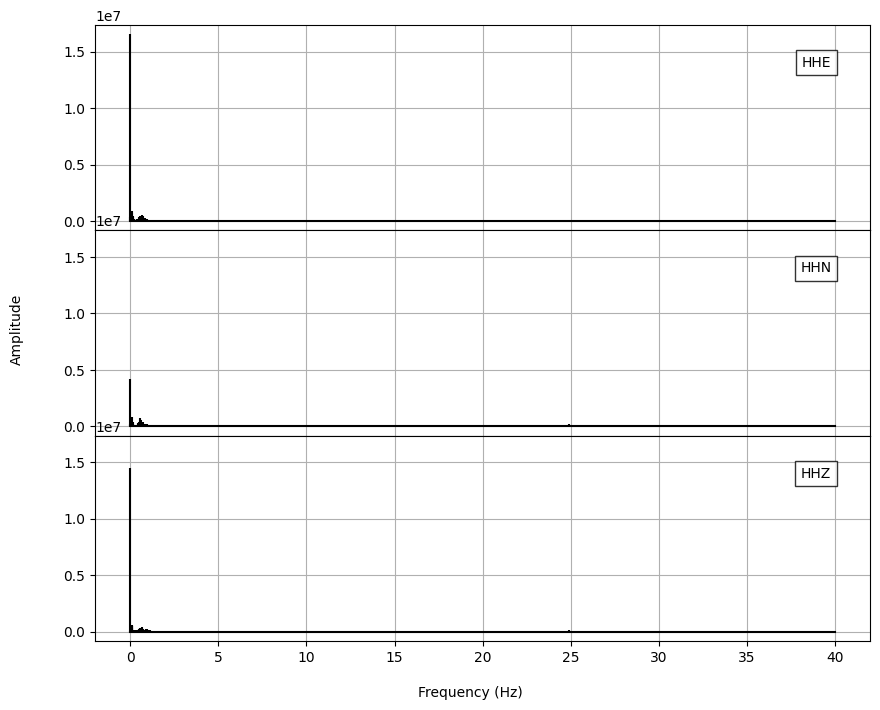

Wrong Classification, Should be 1
151


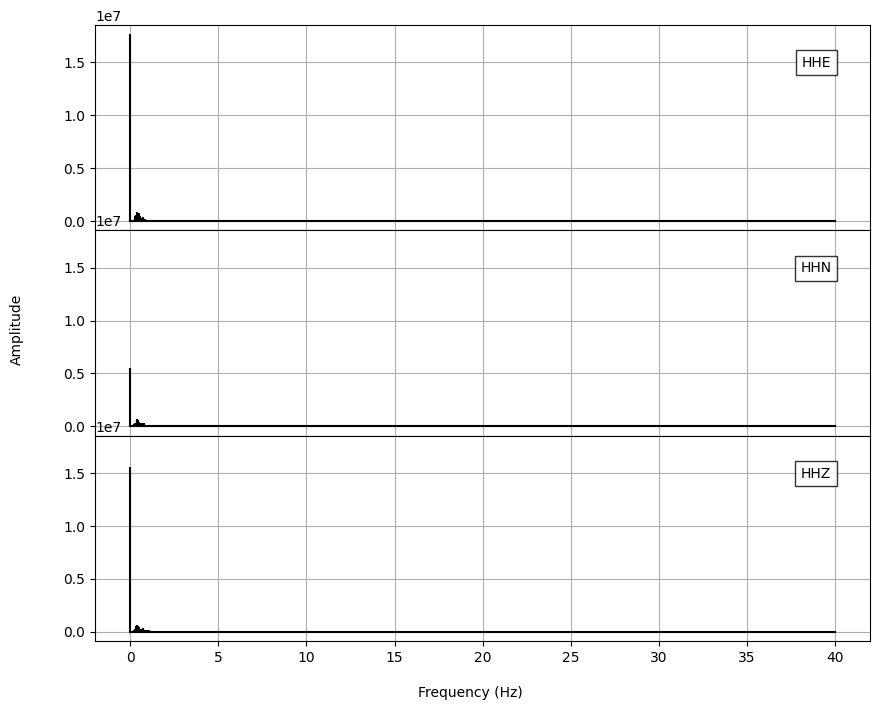

Wrong Classification, Should be 0
278


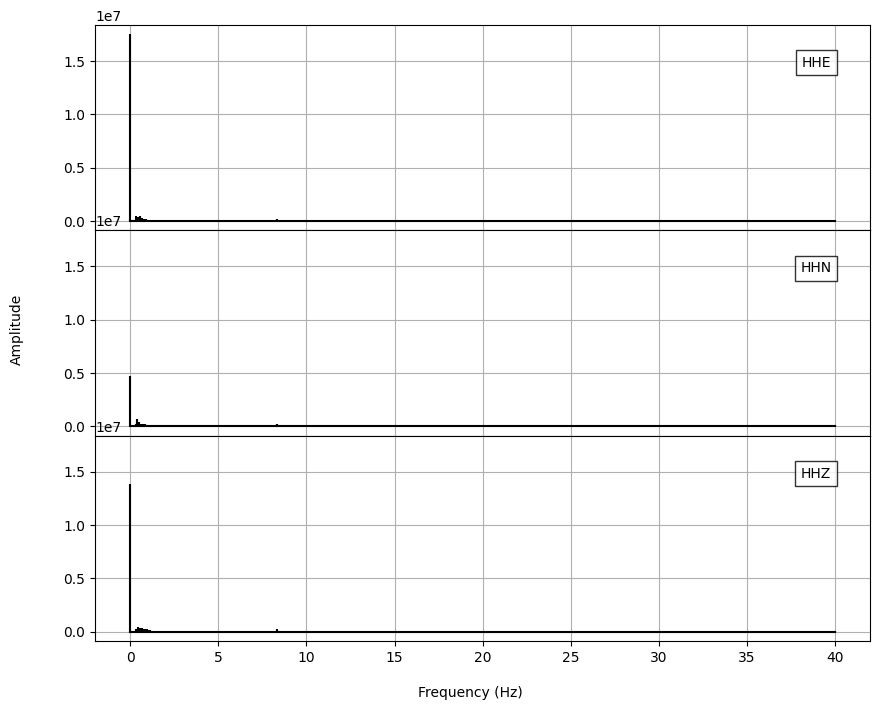

Wrong Classification, Should be 0
298


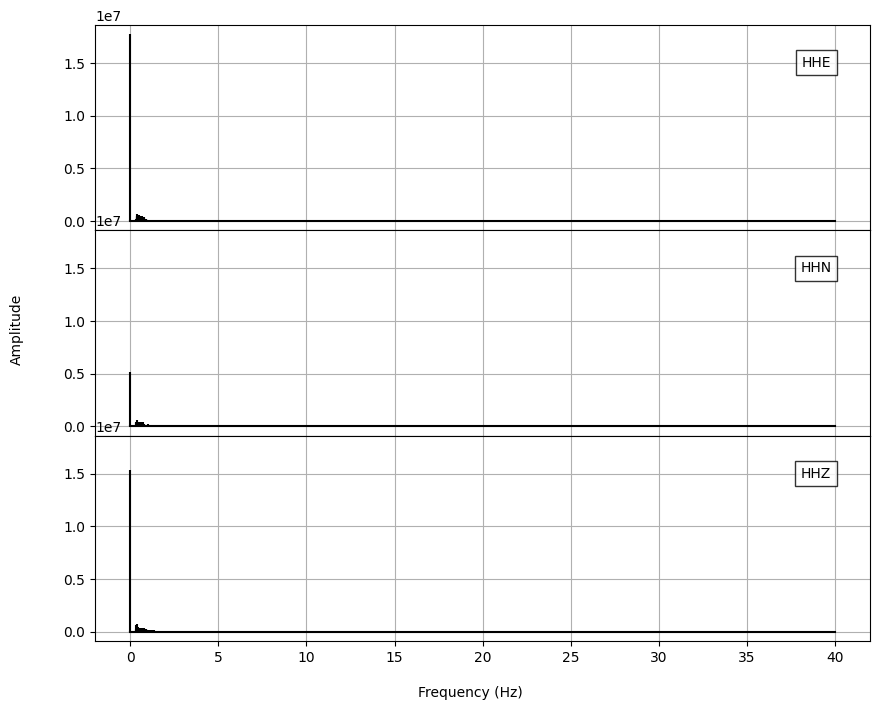

In [84]:
plot_fft_data_obs(test_set, predictions_test, y_test)

In [18]:
test_details['Positive']

{'Positive': [[223,
   '2014-08-11',
   '18:49:52.000',
   'A',
   2014-08-11T18:50:49.924000Z],
  [223, '2014-08-11', '15:24:04.000', nan, 2014-08-11T15:24:42.930000Z],
  [222, '2014-08-10', '17:26:23.000', 'A', 2014-08-10T17:26:46.517000Z],
  [220, '2014-08-08', '03:28:52.050', 'B', 2014-08-08T03:29:12.864000Z],
  [201, '2014-07-20', '08:16:59.000', 'B', 2014-07-20T08:17:20.794000Z],
  [196, '2014-07-15', '17:23:18.150', 'A', 2014-07-15T17:23:35.585000Z],
  [192, '2014-07-11', '22:03:31.350', 'A', 2014-07-11T22:03:50.230000Z],
  [190, '2014-07-09', '15:30:55.500', 'B', 2014-07-09T15:31:13.202000Z],
  [186, '2014-07-05', '13:29:52.688', nan, 2014-07-05T13:30:42.327000Z],
  [183, '2014-07-02', '04:02:52.000', nan, 2014-07-02T04:06:56.925000Z],
  [174, '2014-06-23', '17:51:03.050', 'A', 2014-06-23T17:51:46.690000Z],
  [174, '2014-06-23', '05:48:30.000', 'C', 2014-06-23T05:49:05.730000Z],
  [173, '2014-06-22', '12:56:39.000', nan, 2014-06-22T12:56:42.058000Z],
  [169, '2014-06-18', '03:0

Wrong Classification, Should be 1
90


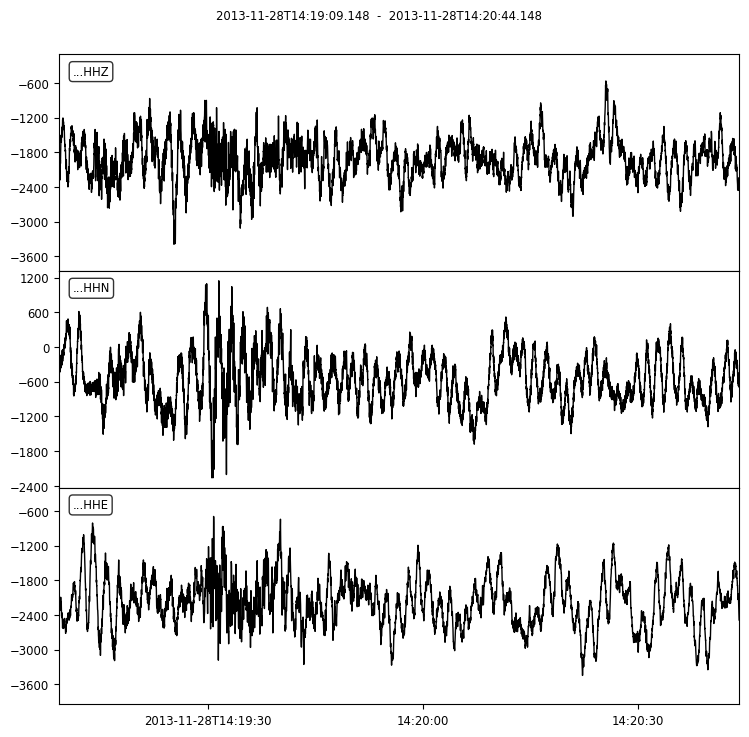

Wrong Classification, Should be 1
151


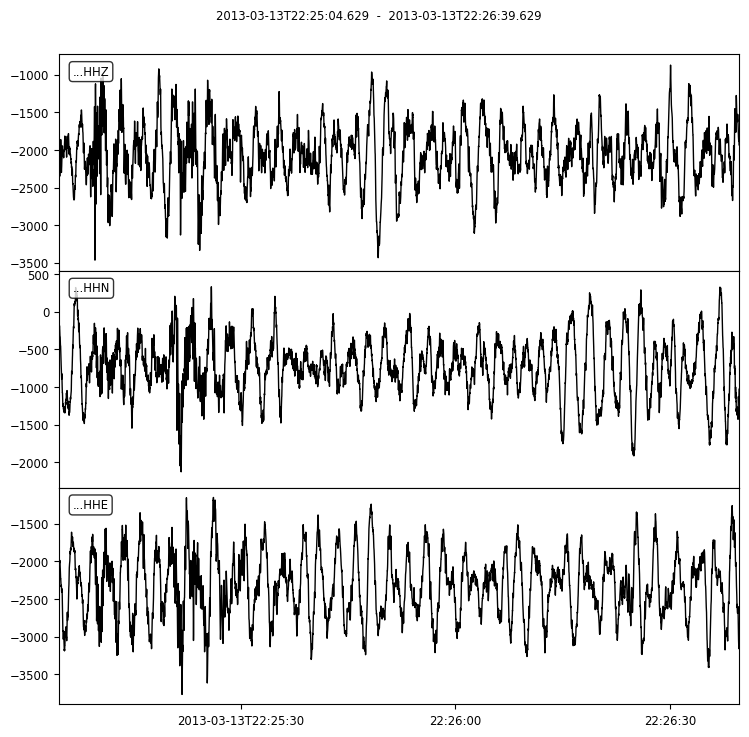

Wrong Classification, Should be 0
278


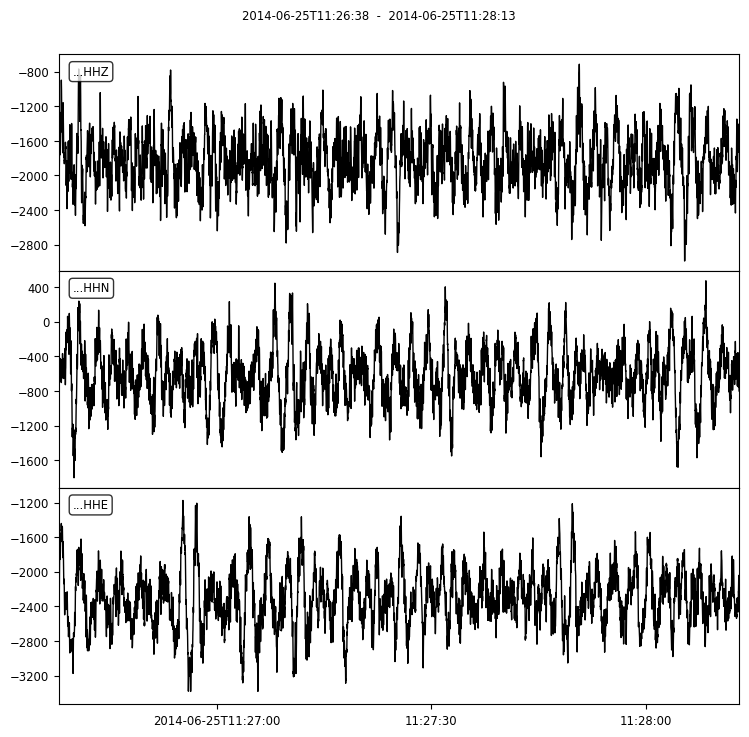

Wrong Classification, Should be 0
298


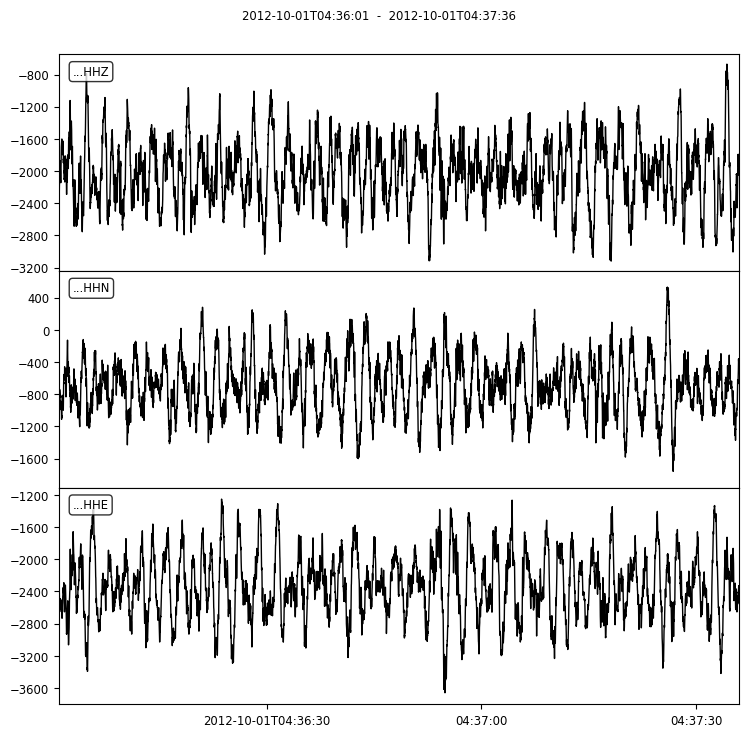

In [16]:
plot_data_obs(test_set, predictions_test, y_test, times)